In [263]:
import pandas as pd
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')
df_vaccine = pd.read_csv('covid_vaccine_statewise.csv')
print(state_df)

             Date                        State  TotalSamples Negative  \
0      2020-04-17  Andaman and Nicobar Islands        1403.0     1210   
1      2020-04-24  Andaman and Nicobar Islands        2679.0      NaN   
2      2020-04-27  Andaman and Nicobar Islands        2848.0      NaN   
3      2020-05-01  Andaman and Nicobar Islands        3754.0      NaN   
4      2020-05-16  Andaman and Nicobar Islands        6677.0      NaN   
...           ...                          ...           ...      ...   
15108  2021-07-02                  West Bengal    14325099.0      NaN   
15109  2021-07-03                  West Bengal    14377860.0      NaN   
15110  2021-07-04                  West Bengal    14430084.0      NaN   
15111  2021-07-05                  West Bengal    14470472.0      NaN   
15112  2021-07-06                  West Bengal    14516751.0      NaN   

       Positive  
0          12.0  
1          27.0  
2          33.0  
3          33.0  
4          33.0  
...         ...

In [247]:
state_df[state_df['State']=='Tamil Nadu'].head()

,Date,State,TotalSamples,Negative,Positive
12492,2020-04-03,Tamil Nadu,3684.0,2789,411.0
12493,2020-04-08,Tamil Nadu,5305.0,4414,690.0
12494,2020-04-09,Tamil Nadu,7267.0,5824,834.0
12495,2020-04-10,Tamil Nadu,8410.0,6838,911.0
12496,2020-04-11,Tamil Nadu,9842.0,7779,969.0


In [ ]:
#VERIFY THE RANGE OF INFORMATION AVAILABLE IN GIVEN DATASET

In [248]:
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-07-07


In [249]:
df=country_df.copy()
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
#FEATURE ENGINEERING------>REMOVING UNWANTED COLUMNS,CHANGE COL DATATYPE,ADD COMPUTATION COLUMN

In [250]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [252]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [253]:
#DATA VISUALIZATION------>TOP 10 HIGHLY IMAPACTED STATES

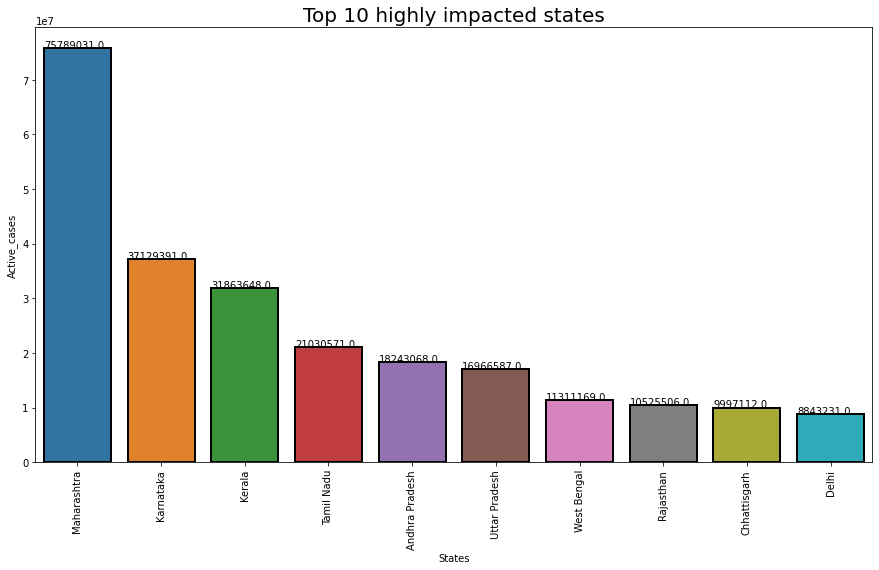

In [254]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
top_10=df.groupby(['States']).sum()[['Active_cases']].sort_values(by=['Active_cases'],ascending=False).reset_index()

fig=plt.figure(figsize=(15,8))
plt.title("Top 10 highly impacted states", size=20)
ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
for i in ax.patches:
    ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

In [ ]:
#ACTIVE NO.OF CASES FOR TOP 5 CITIES

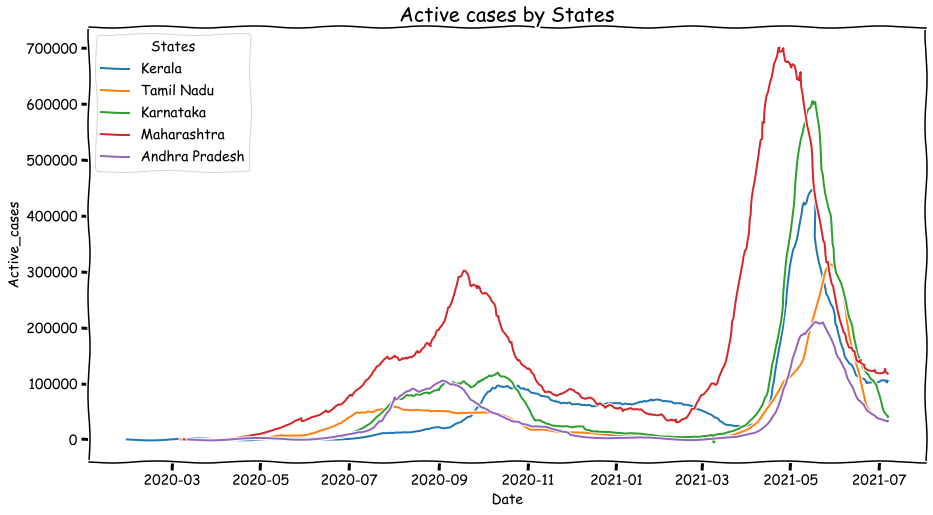

In [36]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['States'].isin(top_10.iloc[:5]['States'].to_list())],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

In [41]:
df[df['States']=='Tamil Nadu']

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
61,62,2020-03-07,Tamil Nadu,1,0,0,0,1,1
67,68,2020-03-08,Tamil Nadu,1,0,0,0,1,1
79,80,2020-03-09,Tamil Nadu,1,0,0,0,1,1
94,95,2020-03-10,Tamil Nadu,1,0,0,0,1,1
105,106,2020-03-11,Tamil Nadu,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
16700,16701,2021-07-03,Tamil Nadu,-,-,2418882,32818,2488407,36707
16736,16737,2021-07-04,Tamil Nadu,-,-,2423606,32933,2492420,35881
16772,16773,2021-07-05,Tamil Nadu,-,-,2427988,33005,2496287,35294
16808,16809,2021-07-06,Tamil Nadu,-,-,2432017,33059,2500002,34926


In [ ]:
#FLOW OF ACTIVE NO. OF CASES FOR ALL STATES

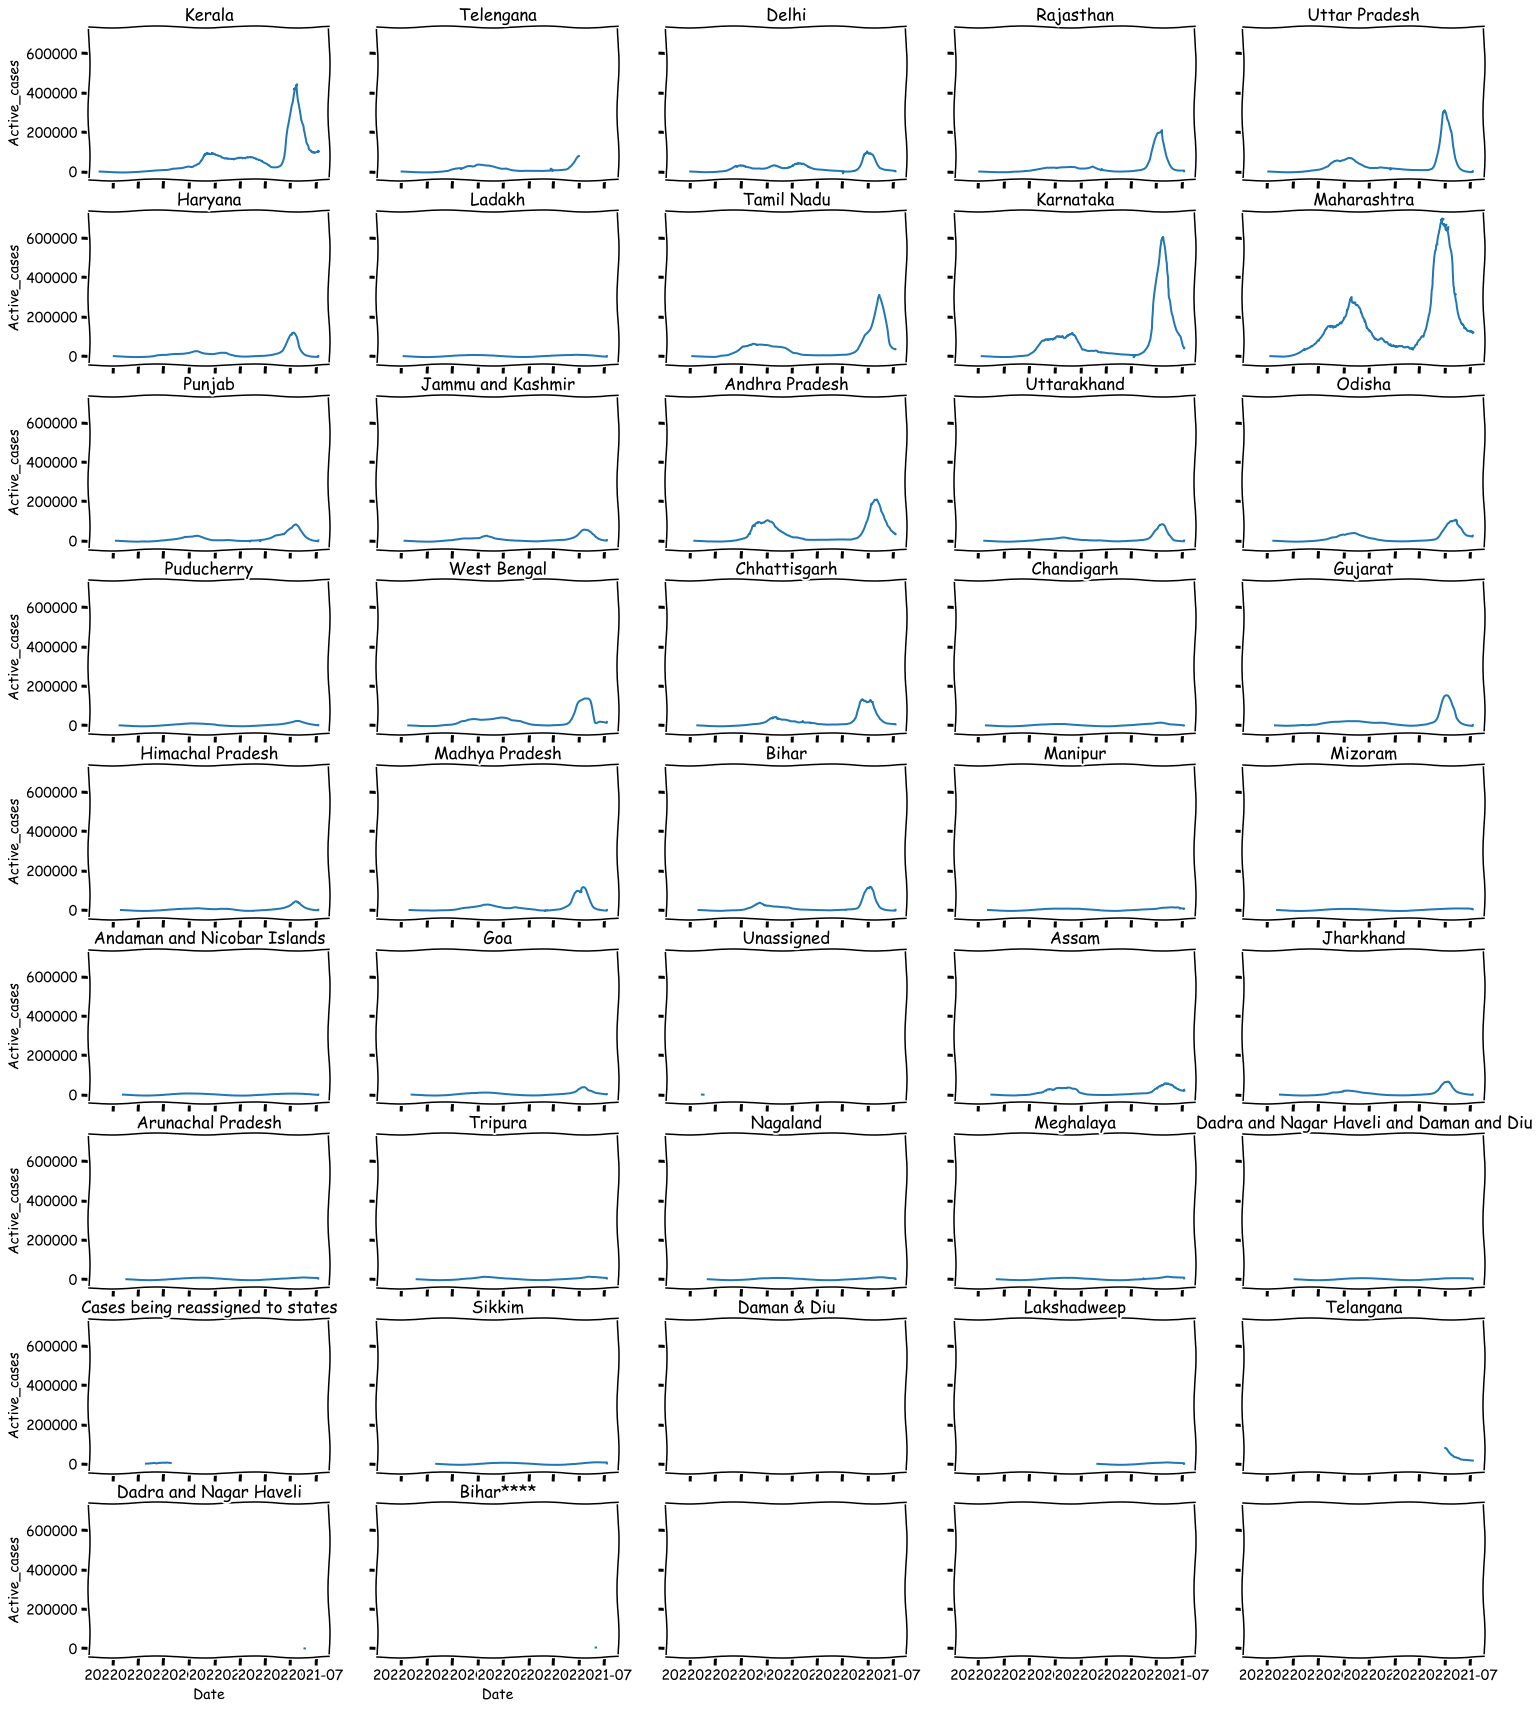

In [54]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=9, ncols=5, figsize=[25,30], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(df['States'].unique()):
        data1=df[df['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

In [ ]:
#BAR PLOT TO FIND THE MEDIAN NO OF ACTIVE CASES FOR TOP 5 STATES AND ALSO CHECK FOR OUTLIERS

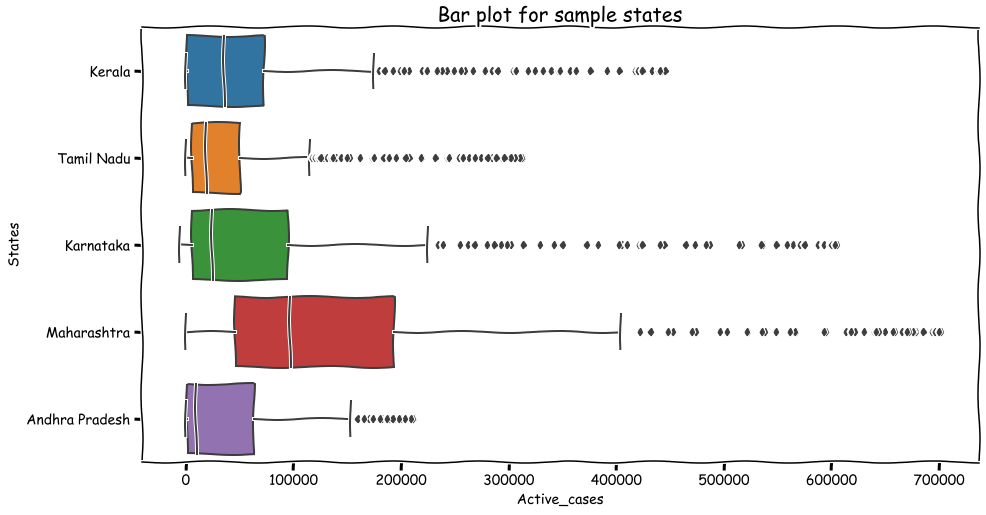

In [55]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(top_10.iloc[:5]['States'].to_list())],x='Active_cases',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [56]:
median_states=df[df['States'].isin(top_10.iloc[:5]['States'].to_list())]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Andhra Pradesh,8173,812517,6779,840730,9473
Karnataka,8134.5,795854,11329.5,840409,24603.5
Kerala,7453,236989,1139,334228,35795
Maharashtra,8138.5,1.55681e+06,44884.5,1.70688e+06,96492.5
Tamil Nadu,8113.5,705238,11258,735603,18853


In [57]:
median_states.groupby(by=['States']).mean().style.bar(['Active_cases'])

,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Andhra Pradesh,8223.73,628215,5125.91,671111,37770.3
Karnataka,8187.32,711212,9915.67,797525,76397.9
Kerala,7581.64,592624,2529.06,655846,60692.7
Maharashtra,8191.66,1.67446e+06,39741.8,1.87015e+06,155945
Tamil Nadu,8167.81,649728,9695.96,702520,43095.4


In [ ]:
#BAR PLOT TO FIND THE MEDIAN NO OF CURED CASES FOR TOP 5 STATES AND ALSO CHECK FOR OUTLIERS

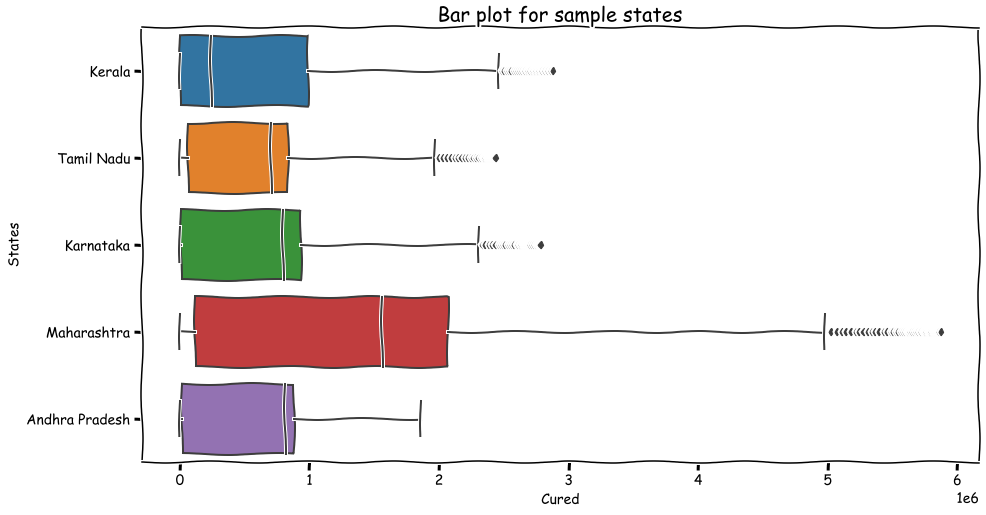

In [58]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(top_10.iloc[:5]['States'].to_list())],x='Cured',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [ ]:
#COMPARISON OF TOP 3 STATES ACTIVE,CONFIRMED,DEATH CASES

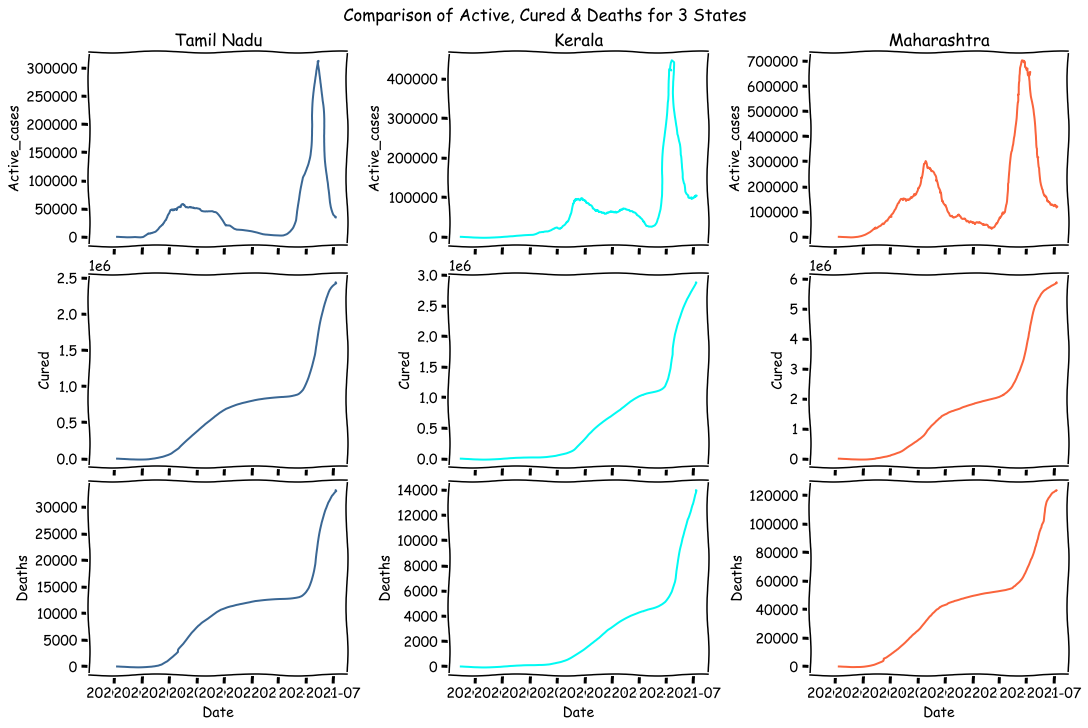

In [60]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

In [ ]:
#STATISTICAL ANALYSIS--->COMPARE THE PROPORTION OF CURED AND ACTIVE CASES OF DIFFERENT STATES

In [70]:
tn_cured = df[df['States']=='Tamil Nadu']['Cured'].mean()
mh_cured=df[df['States']=='Maharashtra']['Cured'].mean()
kl_cured=df[df['States']=='Kerala']['Cured'].mean()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].mean()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].mean()
kl_active=df[df['States']=='Kerala']['Confirmed'].mean()

In [73]:
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


In [114]:
tn_count=df[df['States']=='Tamil Nadu'].reset_index()
daily=[]
daily.append(0)
tn_count.loc[0, 'Daily']=0
for i in range(1, len(tn_count)):
    #print(tn_count['Confirmed'].iloc[i]-tn_count['Confirmed'].iloc[i-1])
    daily.append(tn_count['Confirmed'].iloc[i]-tn_count['Confirmed'].iloc[i-1])
    tn_count.loc[i, 'Daily'] = tn_count['Confirmed'].iloc[i]-tn_count['Confirmed'].iloc[i-1]
  
tn_count[tn_count['Date']=='2020-07-06']

,index,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Daily
121,3812,3813,2020-07-06,Tamil Nadu,-,-,62778,1510,111151,46863,4150.0


In [ ]:
#ANALYSIS OF HOW THE MAY SHUTDOWN REDUCED THE ACTIVE COUNT OF CASES AND WHAT WILL THE PREDICTED CASES OF NEXT 20 DAYS WITHOUT SHUTDOWN

In [255]:
from fbprophet import Prophet
ds=pd.DataFrame(columns=['ds','y'])

ds['ds']=tn_count['Date']
ds['y']=tn_count['Daily']
ds.dropna(inplace=True)
print(ds['ds'].max())
model = Prophet(changepoint_range=1)
model.fit(ds)
future = model.make_future_dataframe(periods=20)
f=model.predict(future)
f['ds']=pd.to_datetime(f['ds'], format='%Y-%m-%d')
f

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2021-07-07 00:00:00


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-07,777.580326,-6618.269108,8015.315618,777.580326,777.580326,64.381863,64.381863,64.381863,64.381863,64.381863,64.381863,0.0,0.0,0.0,841.962189
1,2020-03-08,792.995236,-6316.424231,7615.413383,792.995236,792.995236,60.688956,60.688956,60.688956,60.688956,60.688956,60.688956,0.0,0.0,0.0,853.684192
2,2020-03-09,808.410147,-6669.495950,7797.586875,808.410147,808.410147,48.433979,48.433979,48.433979,48.433979,48.433979,48.433979,0.0,0.0,0.0,856.844126
3,2020-03-10,823.825057,-6907.115412,7702.487773,823.825057,823.825057,-79.711040,-79.711040,-79.711040,-79.711040,-79.711040,-79.711040,0.0,0.0,0.0,744.114017
4,2020-03-11,839.239968,-7114.729979,7450.167573,839.239968,839.239968,-225.186574,-225.186574,-225.186574,-225.186574,-225.186574,-225.186574,0.0,0.0,0.0,614.053394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2021-07-23,21169.249771,14433.527225,28262.984552,21114.252515,21231.639937,79.657256,79.657256,79.657256,79.657256,79.657256,79.657256,0.0,0.0,0.0,21248.907027
504,2021-07-24,21280.329361,14110.853978,28326.371974,21218.413096,21352.678685,64.381863,64.381863,64.381863,64.381863,64.381863,64.381863,0.0,0.0,0.0,21344.711224
505,2021-07-25,21391.408952,14081.416488,28763.361396,21318.072775,21472.227564,60.688956,60.688956,60.688956,60.688956,60.688956,60.688956,0.0,0.0,0.0,21452.097908
506,2021-07-26,21502.488542,14091.561581,28547.381017,21420.774871,21590.882842,48.433979,48.433979,48.433979,48.433979,48.433979,48.433979,0.0,0.0,0.0,21550.922521


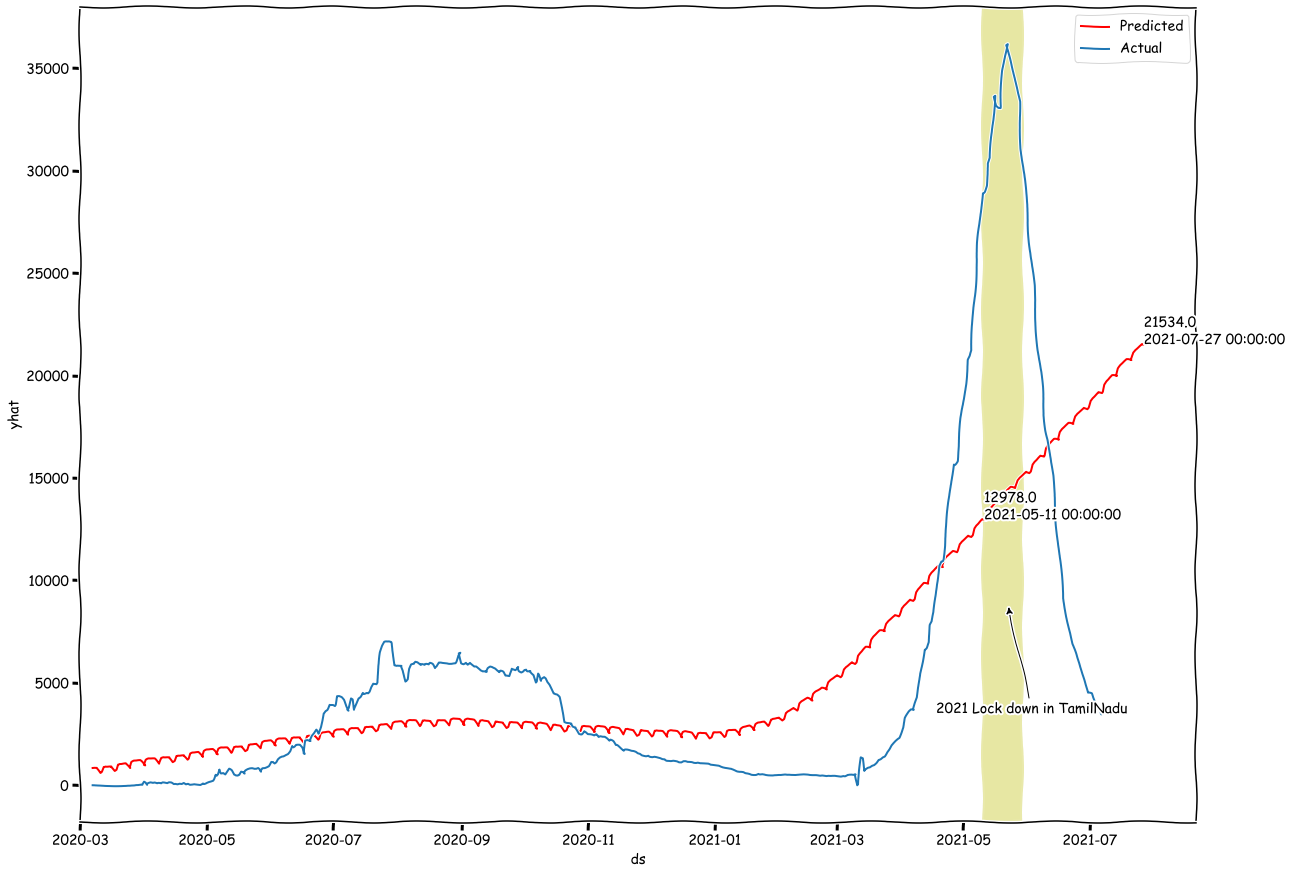

In [259]:
import numpy as np
today=f[f['ds']=='2021-05-11 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(20,15))
    
        
    ax=sns.lineplot(data=f, x='ds',y='yhat', alpha=1, color='red')
    ax=sns.lineplot(data=tn_count, x='Date',y='Daily')
    ax.set_xlim(mtd.datestr2num('2020-03-01'))
    
    ax.annotate(text=str(np.round(f['yhat'].iloc[-1],0))+ "\n"+ str(f['ds'].iloc[-1]), xy=(f['ds'].iloc[-1],f['yhat'].iloc[-1]))
    ax.annotate(text=str(np.round(today['yhat'].iloc[-1],0))+ "\n"+ str(today['ds'].iloc[-1]), xy=(today['ds'].iloc[-1],today['yhat'].iloc[-1]))
    
    ax.annotate(text="2021 Lock down in TamilNadu", xy=(0.70,0.25), xycoords='figure fraction', xytext=(0.65, 0.15),arrowprops={'arrowstyle':'-|>','color':'black'})
    ax.axvspan(xmin='2021-05-10 00:00:00', xmax='2021-05-30 00:00:00', alpha=0.2, facecolor='y')
    
    ax.legend(labels=['Predicted','Actual'], loc='upper right')

In [ ]:
#VACCINATION ANALYSIS

In [152]:
df_vaccine['Updated On']
df_vaccine.sort_values('Updated On', axis = 0, ascending = True,
                 inplace = True, na_position ='first')


In [183]:
df_vaccine[df_vaccine['State']=='Tamil Nadu']

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
5629,01/02/2021,Tamil Nadu,85002.0,4235.0,977.0,85002.0,0.0,33125.0,51872.0,5.0,1606.0,83396.0,NaN,NaN,NaN,NaN,NaN,85002.0
5657,01/03/2021,Tamil Nadu,319966.0,26394.0,2544.0,284640.0,35326.0,120753.0,163867.0,20.0,5222.0,279418.0,NaN,NaN,NaN,NaN,NaN,284640.0
5688,01/04/2021,Tamil Nadu,2965312.0,596320.0,4468.0,2703180.0,262132.0,1357225.0,1345688.0,267.0,398362.0,2566950.0,NaN,85.0,537339.0,1181454.0,983213.0,2703180.0
5718,01/05/2021,Tamil Nadu,6030884.0,461886.0,3764.0,4671707.0,1359177.0,2426960.0,2244224.0,523.0,910724.0,5120160.0,NaN,115.0,837214.0,2121033.0,1712362.0,4671707.0
5749,01/06/2021,Tamil Nadu,9240004.0,647083.0,1940.0,7190142.0,2049862.0,3940737.0,3248526.0,879.0,1448667.0,7791337.0,0.0,130.0,2412174.0,2781604.0,1994628.0,7190142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,30/05/2021,Tamil Nadu,8893998.0,609522.0,2001.0,6875084.0,2018914.0,3752036.0,3122221.0,827.0,1347360.0,7546638.0,0.0,129.0,2205561.0,2702698.0,1965148.0,6875084.0
5778,30/06/2021,Tamil Nadu,15642085.0,838951.0,1205.0,13072807.0,2569278.0,8375147.0,7264601.0,2337.0,2619254.0,13021219.0,1612.0,143.0,6971101.0,5168878.0,3502106.0,13072807.0
5628,31/01/2021,Tamil Nadu,77809.0,3812.0,876.0,77809.0,0.0,30421.0,47384.0,4.0,1505.0,76304.0,NaN,NaN,NaN,NaN,NaN,77809.0
5687,31/03/2021,Tamil Nadu,2905435.0,657690.0,4946.0,2650411.0,255024.0,1329998.0,1320150.0,263.0,390439.0,2514996.0,NaN,85.0,529975.0,1155390.0,963878.0,2650411.0


In [ ]:
#VACCINATED GENDERWISE

[191160373.0, 164971125.0, 61451.0]


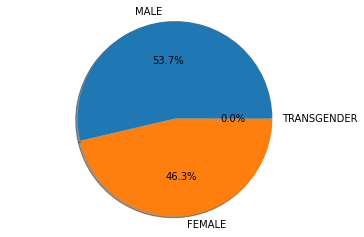

In [165]:
labels = ['MALE','FEMALE','TRANSGENDER']

gender = [df_vaccine["Male(Individuals Vaccinated)"].max(), 
        df_vaccine["Female(Individuals Vaccinated)"].max(),  
        df_vaccine["Transgender(Individuals Vaccinated)"].max()]
fig1, ax1 = plt.subplots()
ax1.pie(gender, labels=labels, autopct='%2.1f%%', shadow=True)
ax1.axis('equal')
#plt.show()
print(gender)

[44018800.0, 312045416.0]


44018800.0

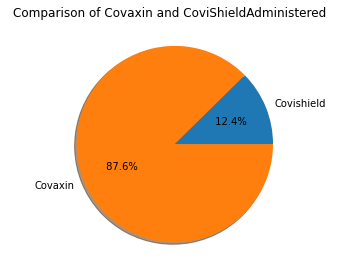

In [260]:
vacc = [df_vaccine["Total Covaxin Administered"].max(), 
       df_vaccine["Total CoviShield Administered"].max()]
labels=['Covishield','Covaxin']

fig1, ax1 = plt.subplots()
plt.suptitle("Comparison of Covaxin and CoviShieldAdministered")
ax1.pie(vacc, labels=labels, autopct='%5.1f%%', shadow=True)
ax1.axis('equal')
#plt.show()
print(vacc)



df_vaccine["Total Covaxin Administered"].max()


In [261]:
TN_tot_doses=df_vaccine[df_vaccine['State']=='Tamil Nadu']["Total Doses Administered"].max()
TN_vac_doses=df_vaccine[df_vaccine['State']=='Tamil Nadu']["Total Individuals Vaccinated"].max()
KE_tot_doses=df_vaccine[df_vaccine['State']=='Kerala']["Total Doses Administered"].max()
KE_vac_doses=df_vaccine[df_vaccine['State']=='Kerala']["Total Individuals Vaccinated"].max()
KA_tot_doses=df_vaccine[df_vaccine['State']=='Karnataka']["Total Doses Administered"].max()
KA_vac_doses=df_vaccine[df_vaccine['State']=='Karnataka']["Total Individuals Vaccinated"].max()
MA_tot_doses=df_vaccine[df_vaccine['State']=='Maharastra']["Total Doses Administered"].max()
MA_vac_doses=df_vaccine[df_vaccine['State']=='Maharastra']["Total Individuals Vaccinated"].max()
KE_tot_doses

15062316.0

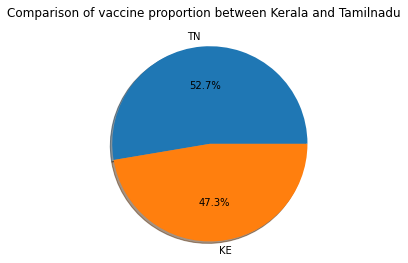

[0.8358899002434123, 0.7517277555456943]


In [262]:
vacc = [TN_vac_doses/TN_tot_doses, 
        KE_vac_doses/KE_tot_doses]
labels=['TN','KE']

fig1, ax1 = plt.subplots()
plt.suptitle("Comparison of vaccine proportion between Kerala and Tamilnadu")
ax1.pie(vacc, labels=labels, autopct='%2.1f%%', shadow=True)
ax1.axis('equal')
plt.show()
print(vacc)

In [ ]:
#ANALYSE DEATH AND ACTIVE CASES AFTER VACCINATION(CONSIDER VACC STARTED AT 1-FEB-2021 ACCORDING TO DATASET)

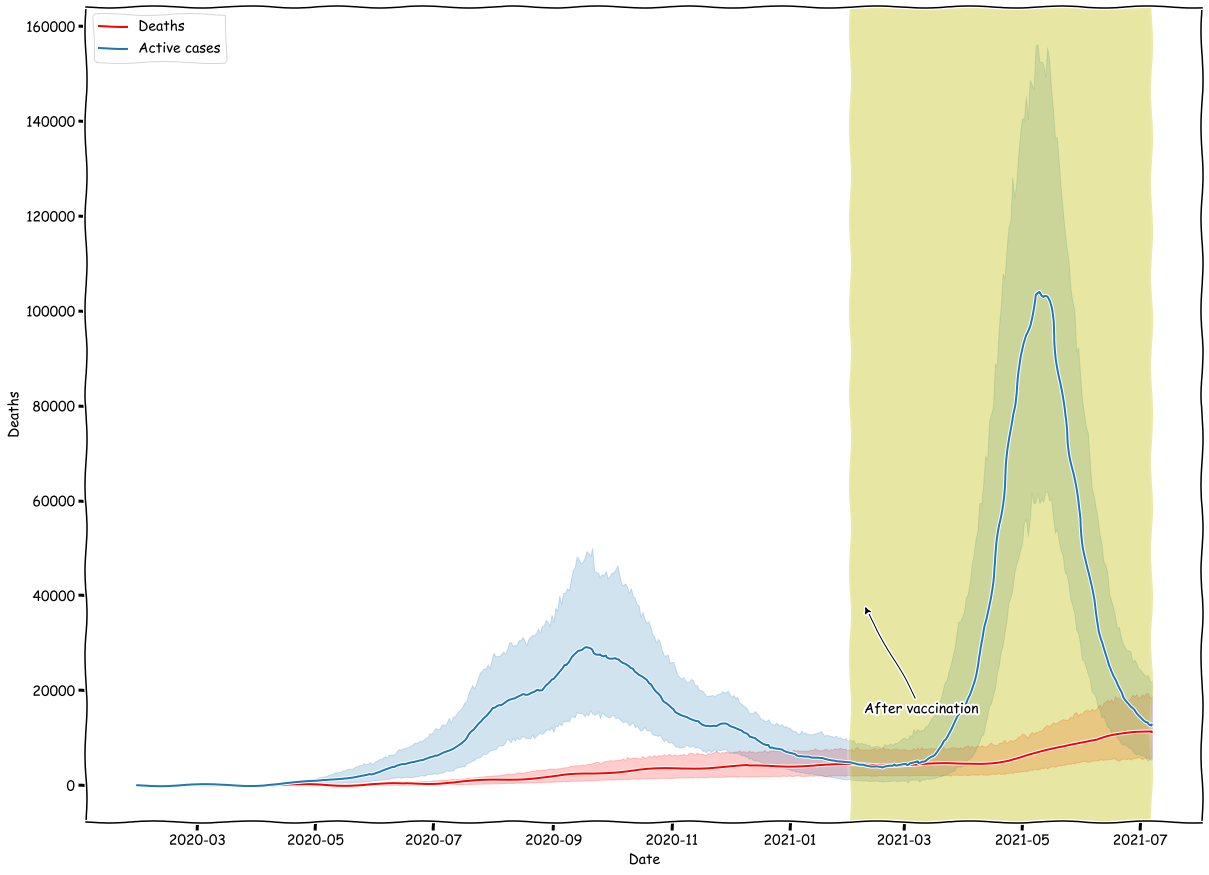

In [215]:
import numpy as np
today=df[df['Date']=='2021-02-01 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(20,15))
    
        
    ax=sns.lineplot(data=df, x='Date',y='Deaths', color='red')
    ax=sns.lineplot(data=df, x='Date',y='Active_cases')
    #ax.set_xlim(mtd.datestr2num('2020-03-01'))
    
    #ax.annotate(text=str(np.round(df['Deaths'].iloc[-1],0))+ "\n"+ str(df['Deaths'].iloc[-1]), xy=(df['Date'].iloc[-1],df['Deaths'].iloc[-1]))
    #ax.annotate(text=str(np.round(today['Deaths'].iloc[-1],0))+ "\n"+ str(today['Death'].iloc[-1]), xy=(today['Death'].iloc[-1],today['Death'].iloc[-1]))
    
    ax.annotate(text="After vaccination", xy=(0.6,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'black'})
    ax.axvspan(xmin='2021-02-01 00:00:00', xmax='2021-07-07 00:00:00', alpha=0.2, facecolor='y')
    
    ax.legend(labels=['Deaths','Active cases'], loc='upper left')

In [231]:
df_state=df.groupby(['States','Date']).sum()[['Deaths','Active_cases']].reset_index()
#df.groupby(['States']).sum()[['Active_cases']].sort_values(by=['Active_cases'],ascending=False).reset_index()
df_TN=df_state[df_state['States']=='Tamil Nadu'].reset_index()
for i in range(0, len(df_TN)):
    df_TN.loc[i, 'D_A'] = tn_count['Deaths'].iloc[i]/tn_count['Active_cases'].iloc[i]
df_TN

,index,States,Date,Deaths,Active_cases,D_A
0,13961,Tamil Nadu,2020-03-07,0,1,0.000000
1,13962,Tamil Nadu,2020-03-08,0,1,0.000000
2,13963,Tamil Nadu,2020-03-09,0,1,0.000000
3,13964,Tamil Nadu,2020-03-10,0,1,0.000000
4,13965,Tamil Nadu,2020-03-11,0,1,0.000000
...,...,...,...,...,...,...
483,14444,Tamil Nadu,2021-07-03,32818,36707,0.894053
484,14445,Tamil Nadu,2021-07-04,32933,35881,0.917840
485,14446,Tamil Nadu,2021-07-05,33005,35294,0.935145
486,14447,Tamil Nadu,2021-07-06,33059,34926,0.946544


In [ ]:
#ANALYSIS OF PROPORTION OF DEATH TO ACTIVE RATIO AFTER VACCINE

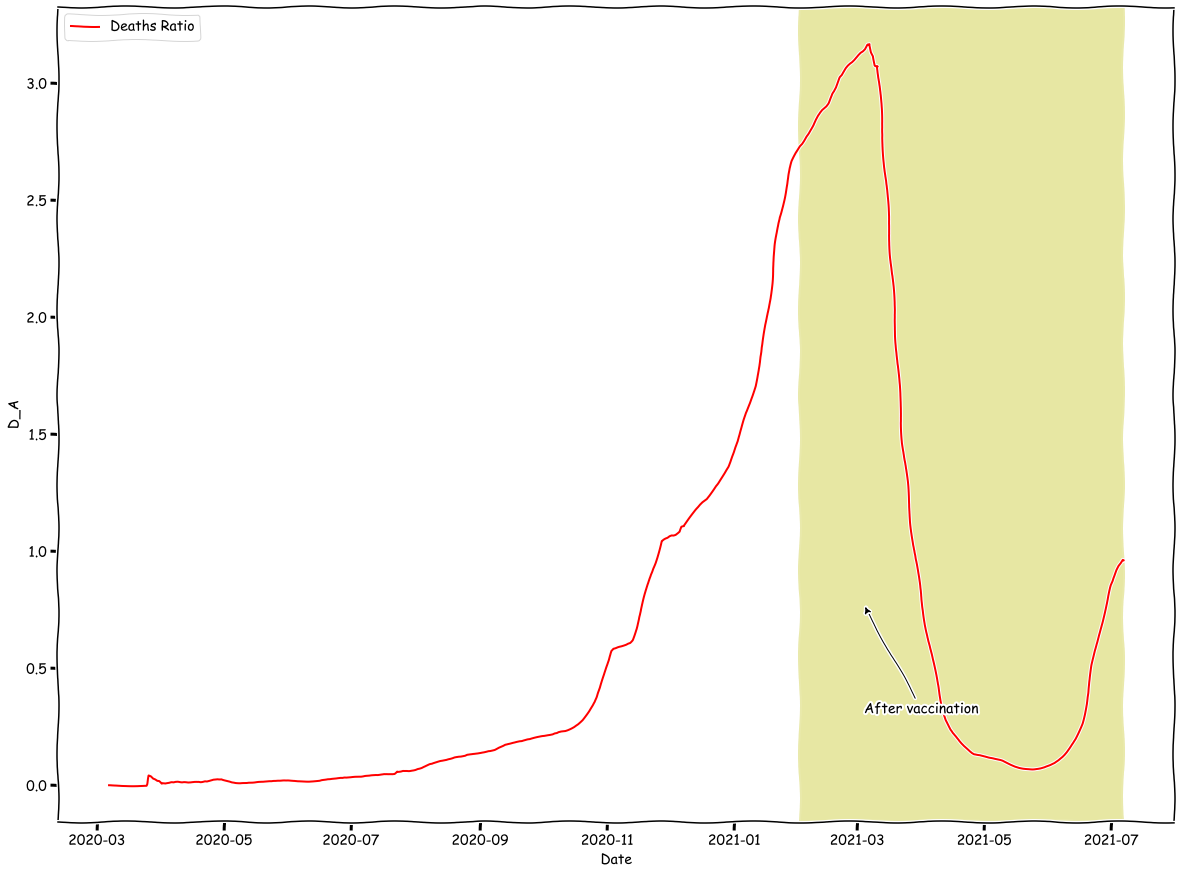

In [243]:
import numpy as np
today=df_TN[df_TN['Date']=='2021-02-01 00:00:00']
with plt.xkcd():
    fig=plt.figure(figsize=(20,15))
    
    df_vaccine['Updated On']=pd.to_datetime(df_vaccine['Updated On'])  
    ax=sns.lineplot(data=df_TN, x='Date',y='D_A', color='red')
    #ax=sns.lineplot(data=df, x='Date',y='Active_cases')
    #ax=sns.lineplot(data=df_vaccine[df_vaccine['State']=='Tamil Nadu'],y='Total Individuals Vaccinated',x='Updated On')
    #ax.set_xlim(mtd.datestr2num('2020-03-01'))
    
    #ax.annotate(text=str(np.round(df['Deaths'].iloc[-1],0))+ "\n"+ str(df['Deaths'].iloc[-1]), xy=(df['Date'].iloc[-1],df['Deaths'].iloc[-1]))
    #ax.annotate(text=str(np.round(today['Deaths'].iloc[-1],0))+ "\n"+ str(today['Death'].iloc[-1]), xy=(today['Death'].iloc[-1],today['Death'].iloc[-1]))
    
    ax.annotate(text="After vaccination", xy=(0.6,0.25), xycoords='figure fraction', xytext=(0.60, 0.15),arrowprops={'arrowstyle':'-|>','color':'black'})
    ax.axvspan(xmin='2021-02-01 00:00:00', xmax='2021-07-07 00:00:00', alpha=0.2, facecolor='y')
    
    ax.legend(labels=['Deaths Ratio'], loc='upper left')